# Capstone Project



## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
df = pd.read_csv("/content/expected_ctc.csv")

## Initial Analysis

In [ ]:
print(df.head())

   IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

       Department               Role   Industry Organization      Designation  \
0             NaN                NaN        NaN          NaN              NaN   
1              HR         Consultant  Analytics            H               HR   
2  Top Management         Consultant   Training            J              NaN   
3         Banking  Financial Analyst   Aviation            F               HR   
4           Sales    Project Manager  Insurance            E  Medical Officer   

   Education  ... Curent_Location Preferred_locati

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [ ]:
print(df.describe())

                IDX  Applicant_ID  Total_Experience  \
count  25000.000000  25000.000000      25000.000000   
mean   12500.500000  34993.240080         12.493080   
std     7217.022701  14390.271591          7.471398   
min        1.000000  10000.000000          0.000000   
25%     6250.750000  22563.750000          6.000000   
50%    12500.500000  34974.500000         12.000000   
75%    18750.250000  47419.000000         19.000000   
max    25000.000000  60000.000000         25.000000   

       Total_Experience_in_field_applied  Passing_Year_Of_Graduation  \
count                       25000.000000                18820.000000   
mean                            6.258200                 2002.193624   
std                             5.819513                    8.316640   
min                             0.000000                 1986.000000   
25%                             1.000000                 1996.000000   
50%                             5.000000                 2002.000000   


## Check for Duplicates

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj


## Outlier Detection and Correction






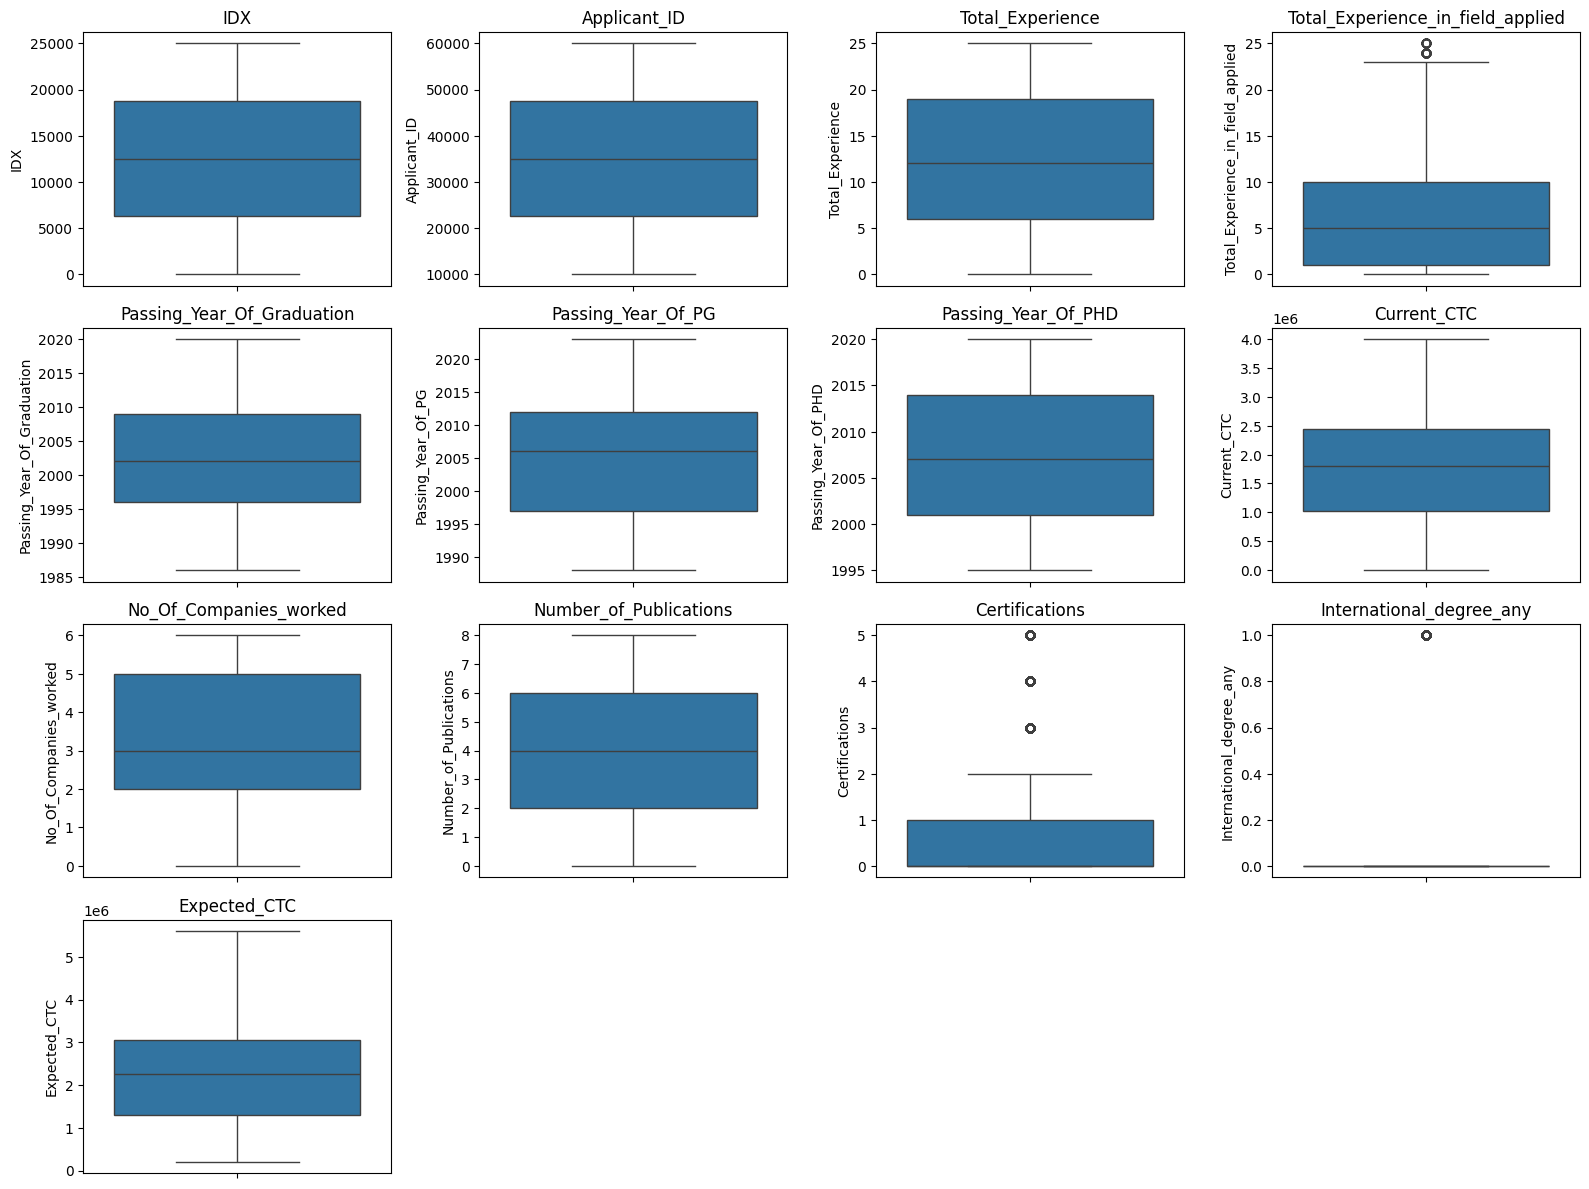

In [ ]:
num_cols = df.select_dtypes(include = ["float64", "int64"]).columns.tolist()

n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize = (4*n_cols, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y = df[col], ax = axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
def outlier_correction(df, col, show_plot = True):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

    return df

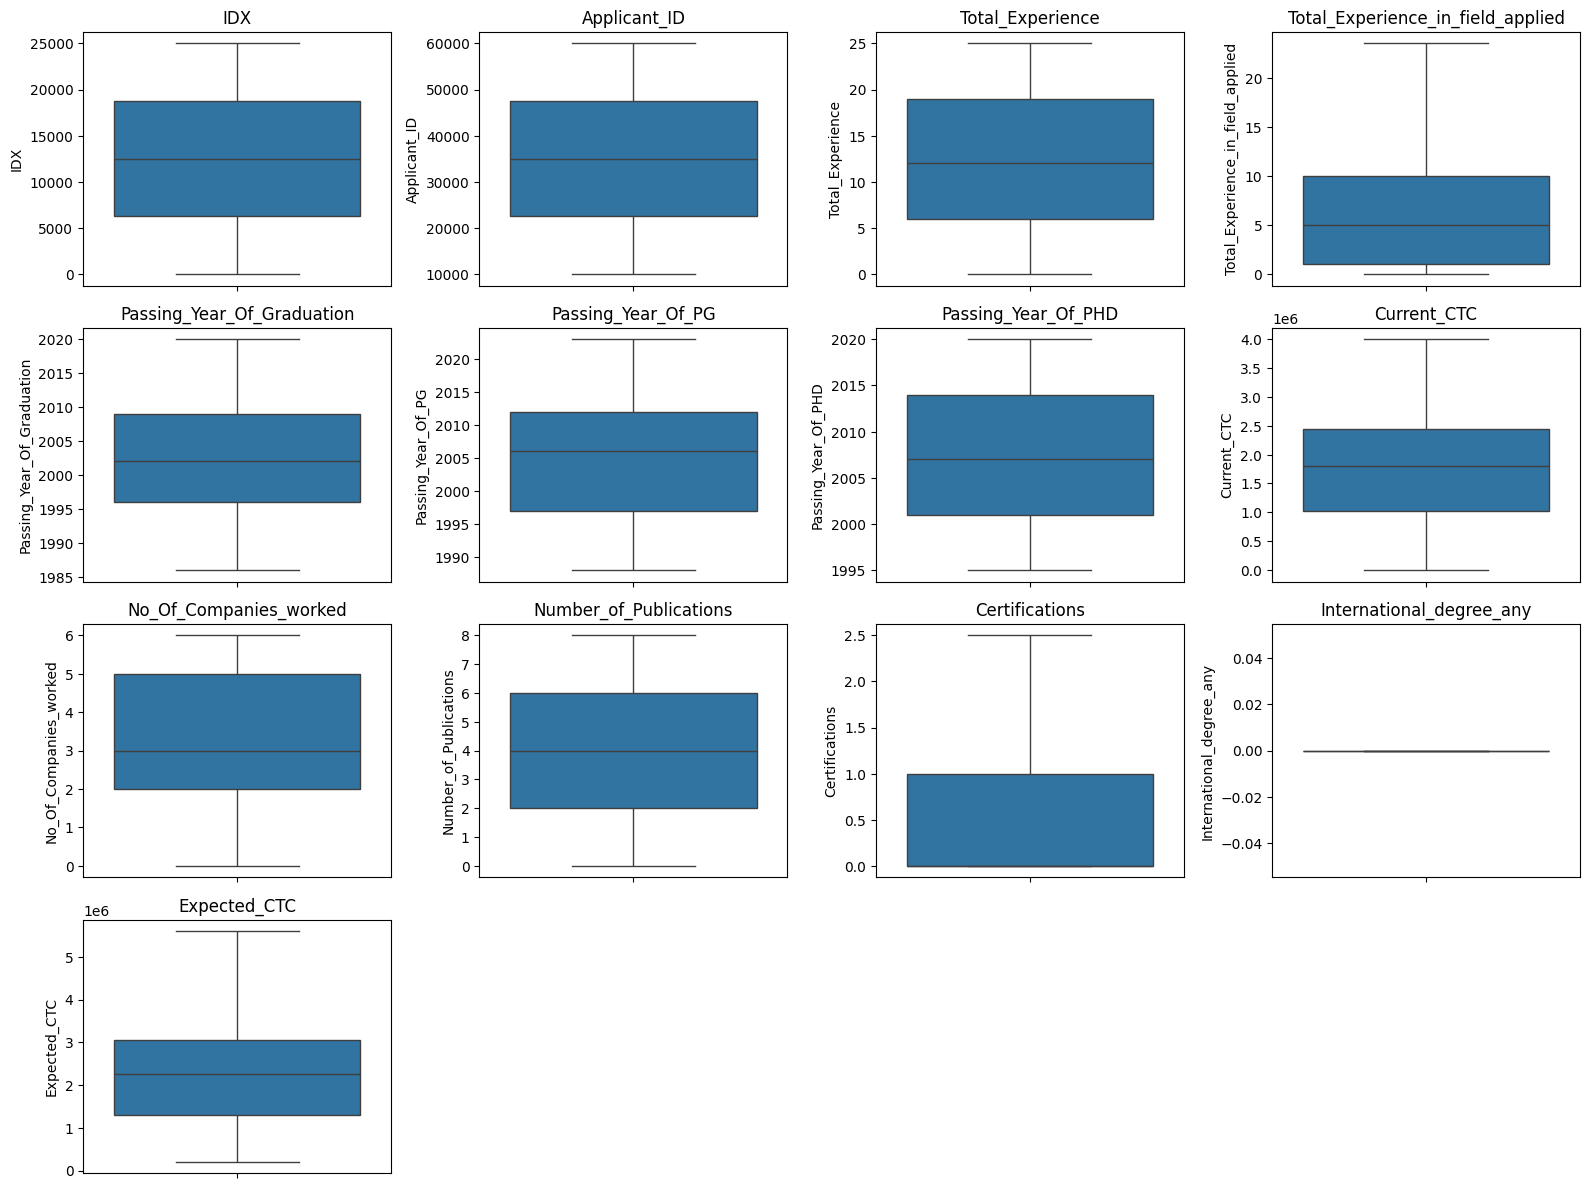

In [ ]:
for col in num_cols:
    df = outlier_correction(df, col, show_plot=False)

n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize = (4*n_cols, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y = df[col], ax = axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


## Handling Missing Values

In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ["float64", "int64"]:
            df[col].fillna(df[col].mean(), inplace = True)
        else:
            df[col].fillna(df[col].mode()[0], inplace = True)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  float64
 1   Applicant_ID                       25000 non-null  float64
 2   Total_Experience                   25000 non-null  float64
 3   Total_Experience_in_field_applied  25000 non-null  float64
 4   Department                         25000 non-null  object 
 5   Role                               25000 non-null  object 
 6   Industry                           25000 non-null  object 
 7   Organization                       25000 non-null  object 
 8   Designation                        25000 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          25000 non-null  object 
 11  University_Grad                    25000 non-null  obj

## Distribution of Features

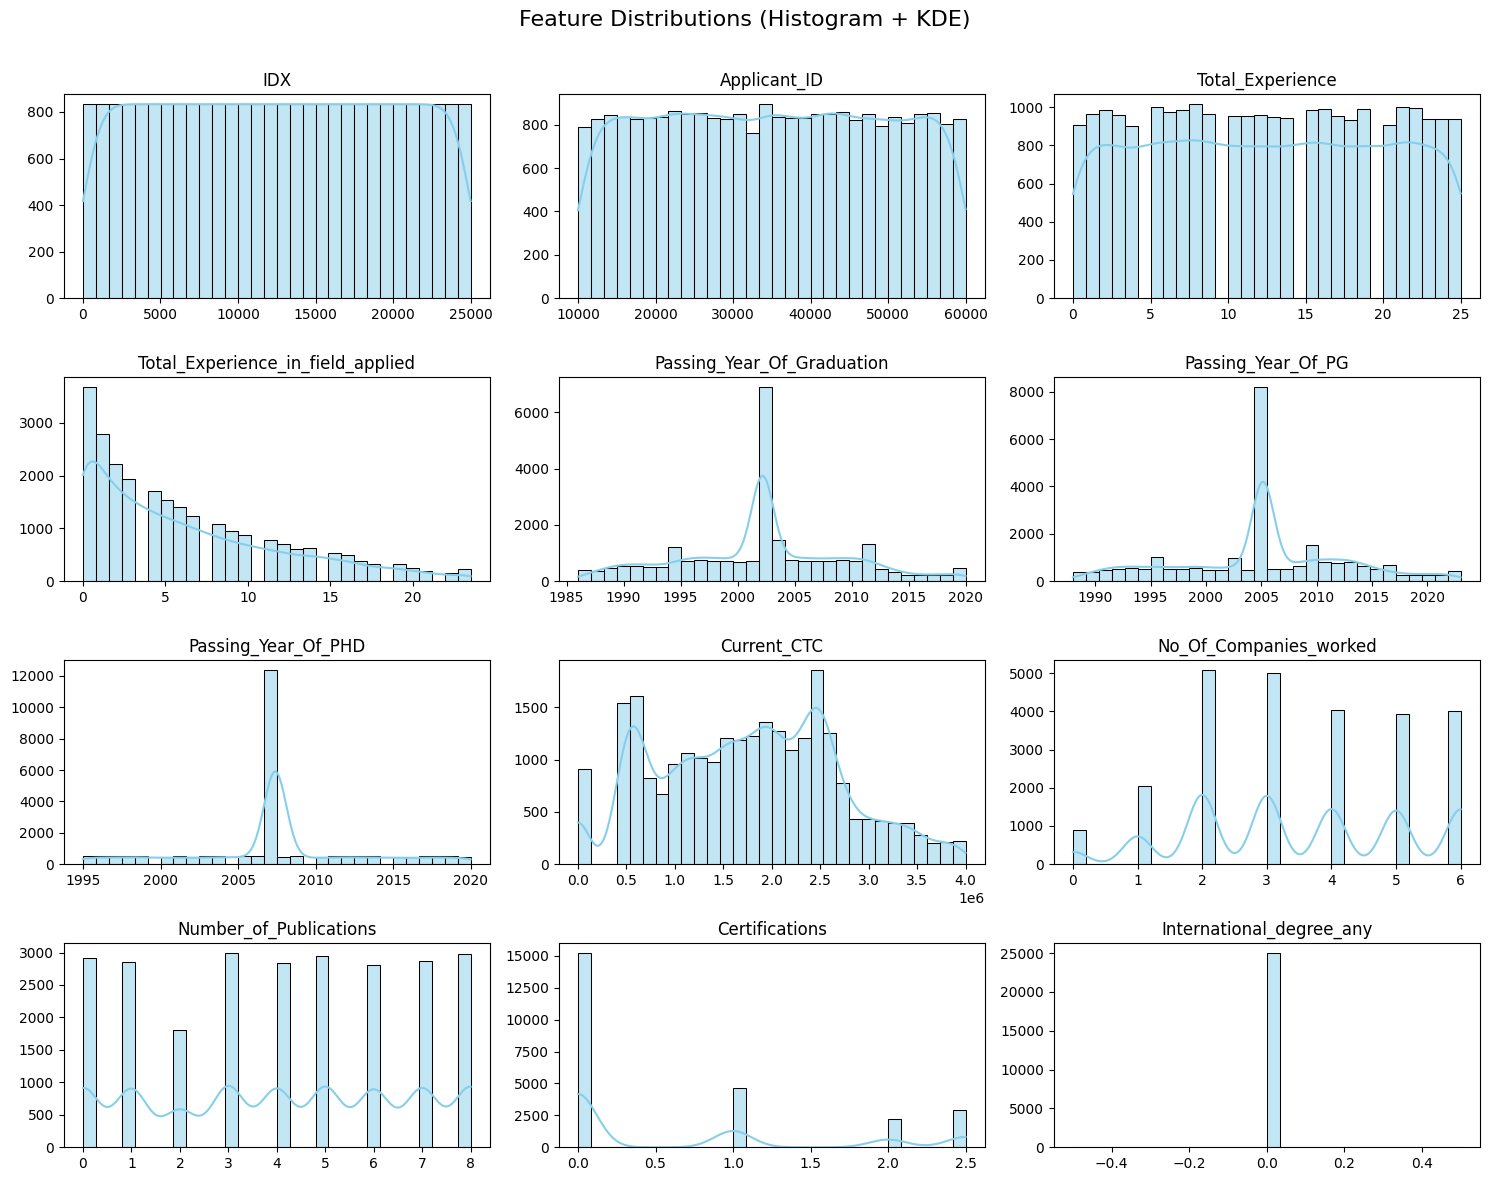

In [ ]:
n_cols = 3
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols[:n_rows * n_cols]):
    sns.histplot(df[col], kde = True, bins = 30, ax = axes[i], color = 'skyblue')
    axes[i].set_title(col, fontsize = 12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

fig.suptitle("Feature Distributions (Histogram + KDE)", fontsize = 16)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()


## Bivariate Analysis

In [ ]:
sns.pairplot(df[num_cols], diag_kind = 'hist')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Correlation and Heatmap

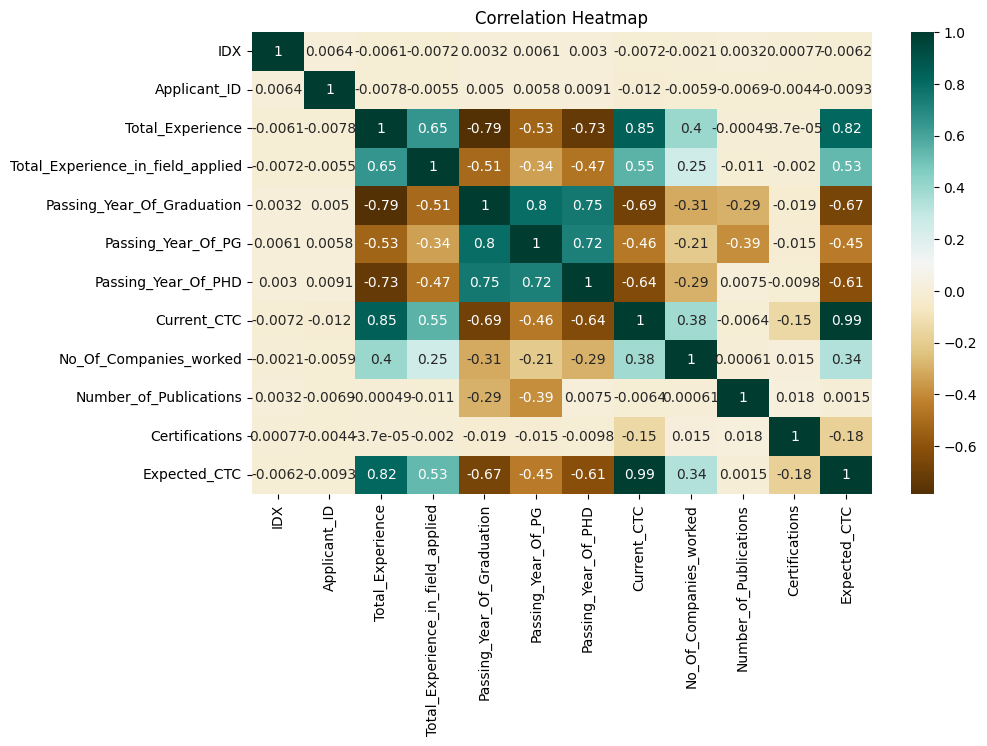

In [ ]:
num_cols = [col for col in num_cols if col != 'International_degree_any']

plt.figure(figsize = (10,6))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = "BrBG")
plt.title("Correlation Heatmap")
plt.show()

## Normalisation and Scaling

In [ ]:
num_cols = df.select_dtypes(include = ["float64", "int64"]).columns.tolist()

In [ ]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


print(df.head())

        IDX  Applicant_ID  Total_Experience  \
0 -1.731982     -0.850608         -1.672154   
1 -1.731843      1.118400          1.406314   
2 -1.731704      0.237649          1.138621   
3 -1.731566     -1.632541          0.335542   
4 -1.731427      1.664196         -0.333690   

   Total_Experience_in_field_applied      Department               Role  \
0                          -1.076925       Marketing             Others   
1                           1.333713              HR         Consultant   
2                           0.989336  Top Management         Consultant   
3                           0.300583         Banking  Financial Analyst   
4                          -0.215983           Sales    Project Manager   

    Industry Organization      Designation  Education  ... Curent_Location  \
0   Training            M               HR         PG  ...        Guwahati   
1  Analytics            H               HR  Doctorate  ...       Bangalore   
2   Training            J       

## Encoding

In [ ]:
df = pd.get_dummies(df, drop_first = False).astype(int)

print(df.head())

   IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0   -1             0                -1                                 -1   
1   -1             1                 1                                  1   
2   -1             0                 1                                  0   
3   -1            -1                 0                                  0   
4   -1             1                 0                                  0   

   Passing_Year_Of_Graduation  Passing_Year_Of_PG  Passing_Year_Of_PHD  \
0                           2                   0                    0   
1                          -1                  -2                   -1   
2                          -1                  -1                   -1   
3                           0                   0                    0   
4                           0                   0                    0   

   Current_CTC  No_Of_Companies_worked  Number_of_Publications  ...  \
0           -1       

## Train Test Split

In [ ]:
X = df.drop(columns=['Expected_CTC'])
y = df['Expected_CTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Coefficient (slope): 0.0027
Intercept: -0.0067


In [ ]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0439
Root Mean Squared Error (RMSE): 0.2095
Mean Absolute Error (MAE): 0.0989
R-squared (R²): 0.9041


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0421
Root Mean Squared Error (RMSE): 0.2053
Mean Absolute Error (MAE): 0.0977
R-squared (R²): 0.9064


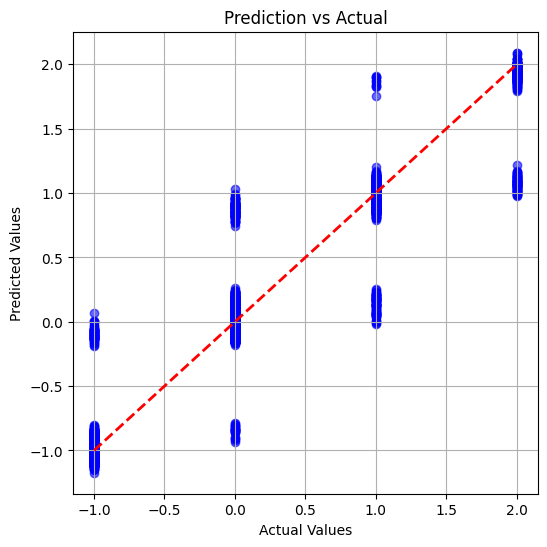

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual")
plt.grid(True)
plt.show()

## Support Vector Machine

In [ ]:
model = SVR(kernel = 'rbf', C = 10, epsilon = 0.1, gamma = 0.1)
model.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [ ]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0066
Root Mean Squared Error (RMSE): 0.0810
Mean Absolute Error (MAE): 0.0740
R-squared (R²): 0.9857


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0467
Root Mean Squared Error (RMSE): 0.2160
Mean Absolute Error (MAE): 0.1456
R-squared (R²): 0.8963


In [ ]:
model = SVR(kernel = 'linear', C = 1)
model.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [ ]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0512
Root Mean Squared Error (RMSE): 0.2263
Mean Absolute Error (MAE): 0.1403
R-squared (R²): 0.8881


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0489
Root Mean Squared Error (RMSE): 0.2212
Mean Absolute Error (MAE): 0.1380
R-squared (R²): 0.8913


## Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators = 100, max_depth = None, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0048
Root Mean Squared Error (RMSE): 0.0696
Mean Absolute Error (MAE): 0.0246
R-squared (R²): 0.9894


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0328
Root Mean Squared Error (RMSE): 0.1812
Mean Absolute Error (MAE): 0.0655
R-squared (R²): 0.9270


### Fine tuning

In [ ]:
model = RandomForestRegressor(random_state = 42)

param_grid = {
   "n_estimators": [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    verbose = 2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
best_rf = grid_search.best_estimator_

In [ ]:
y_pred_train = best_rf.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0244
Root Mean Squared Error (RMSE): 0.1561
Mean Absolute Error (MAE): 0.0527
R-squared (R²): 0.9468


In [ ]:
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0318
Root Mean Squared Error (RMSE): 0.1783
Mean Absolute Error (MAE): 0.0608
R-squared (R²): 0.9294


In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index = X.columns)
feature_importances.sort_values(ascending = False, inplace = True)
print("\nTop 10 Important Features:\n", feature_importances.head(10))


Top 10 Important Features:
 Current_CTC                            0.939993
Education_Under Grad                   0.007795
Education_Grad                         0.007533
Last_Appraisal_Rating_Key_Performer    0.003757
Education_Doctorate                    0.003397
Last_Appraisal_Rating_C                0.003070
Last_Appraisal_Rating_D                0.002833
No_Of_Companies_worked                 0.002032
Last_Appraisal_Rating_B                0.001950
Last_Appraisal_Rating_A                0.001912
dtype: float64


## AdaBoost

In [ ]:
model = AdaBoostRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0591
Root Mean Squared Error (RMSE): 0.2430
Mean Absolute Error (MAE): 0.1425
R-squared (R²): 0.8709


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0565
Root Mean Squared Error (RMSE): 0.2378
Mean Absolute Error (MAE): 0.1401
R-squared (R²): 0.8744


### Fine tuning

In [ ]:
model = AdaBoostRegressor(random_state = 42)

param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    verbose = 2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}


In [ ]:
best_rf = grid_search.best_estimator_

In [ ]:
y_pred_train = best_rf.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0434
Root Mean Squared Error (RMSE): 0.2083
Mean Absolute Error (MAE): 0.0873
R-squared (R²): 0.9051


In [ ]:
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0433
Root Mean Squared Error (RMSE): 0.2081
Mean Absolute Error (MAE): 0.0866
R-squared (R²): 0.9038


In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index = X.columns)
feature_importances.sort_values(ascending = False, inplace = True)
print("\nTop 10 Important Features:\n", feature_importances.head(10))


Top 10 Important Features:
 Current_CTC                            0.933622
Education_Doctorate                    0.027894
Last_Appraisal_Rating_Key_Performer    0.021345
Total_Experience                       0.007869
Last_Appraisal_Rating_C                0.004115
Passing_Year_Of_PG                     0.001193
Education_PG                           0.001085
Last_Appraisal_Rating_D                0.001057
Education_Under Grad                   0.000866
Education_Grad                         0.000616
dtype: float64


## Gradient Boost

In [ ]:
model = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0332
Root Mean Squared Error (RMSE): 0.1822
Mean Absolute Error (MAE): 0.0762
R-squared (R²): 0.9274


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0335
Root Mean Squared Error (RMSE): 0.1830
Mean Absolute Error (MAE): 0.0763
R-squared (R²): 0.9256


### Fine tuning

In [ ]:
model = GradientBoostingRegressor(random_state = 42)

param_grid = {
   "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7]
}

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    verbose = 2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
best_rf = grid_search.best_estimator_

In [ ]:
y_pred_train = best_rf.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0241
Root Mean Squared Error (RMSE): 0.1552
Mean Absolute Error (MAE): 0.0628
R-squared (R²): 0.9473


In [ ]:
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0325
Root Mean Squared Error (RMSE): 0.1802
Mean Absolute Error (MAE): 0.0731
R-squared (R²): 0.9278


In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index = X.columns)
feature_importances.sort_values(ascending = False, inplace = True)
print("\nTop 10 Important Features:\n", feature_importances.head(10))


Top 10 Important Features:
 Current_CTC                            0.941561
Education_Doctorate                    0.007476
Education_PG                           0.005255
Last_Appraisal_Rating_D                0.004455
Last_Appraisal_Rating_C                0.004288
Education_Grad                         0.003939
Education_Under Grad                   0.003903
Last_Appraisal_Rating_Key_Performer    0.002404
No_Of_Companies_worked                 0.002385
Total_Experience                       0.002177
dtype: float64


## XGBoost

In [ ]:
model = XGBRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0101
Root Mean Squared Error (RMSE): 0.1006
Mean Absolute Error (MAE): 0.0466
R-squared (R²): 0.9779


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0348
Root Mean Squared Error (RMSE): 0.1865
Mean Absolute Error (MAE): 0.0824
R-squared (R²): 0.9227


### Fine tuning

In [ ]:
model = XGBRegressor(random_state = 42)

param_grid = {
   "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7]
}

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    verbose = 2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
best_rf = grid_search.best_estimator_

In [ ]:
y_pred_train = best_rf.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0254
Root Mean Squared Error (RMSE): 0.1595
Mean Absolute Error (MAE): 0.0646
R-squared (R²): 0.9444


In [ ]:
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0325
Root Mean Squared Error (RMSE): 0.1803
Mean Absolute Error (MAE): 0.0732
R-squared (R²): 0.9278


In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index = X.columns)
feature_importances.sort_values(ascending = False, inplace = True)
print("\nTop 10 Important Features:\n", feature_importances.head(10))


Top 10 Important Features:
 Current_CTC                            0.666744
Education_Under Grad                   0.023858
Education_PG                           0.022527
Education_Grad                         0.017508
Last_Appraisal_Rating_Key_Performer    0.011057
Last_Appraisal_Rating_D                0.008238
PHD_Specialization_Mathematics         0.008214
Education_Doctorate                    0.007373
Last_Appraisal_Rating_C                0.005963
No_Of_Companies_worked                 0.005512
dtype: float32


## Multi Layer Perceptron

In [ ]:
model = MLPRegressor(hidden_layer_sizes = (100, 50), activation = 'relu',solver = 'adam', max_iter = 1000, random_state = 42)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0027
Root Mean Squared Error (RMSE): 0.0516
Mean Absolute Error (MAE): 0.0358
R-squared (R²): 0.9942


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0567
Root Mean Squared Error (RMSE): 0.2381
Mean Absolute Error (MAE): 0.1372
R-squared (R²): 0.8741


### Fine tuning

In [ ]:
model = MLPRegressor(max_iter = 1000, early_stopping = True, random_state = 42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_grid,
    n_iter = 20,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    verbose = 2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, max_iter=1000,
                                          random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (100, 50),
                                                               (128, 64, 32)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'learning_rate_init': [0.001, 0.01],
                                        'solver': ['adam', 'lbfgs']},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.01, 'activation': 'tanh'}


In [ ]:
best_rf = grid_search.best_estimator_

In [ ]:
y_pred_train = best_rf.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0300
Root Mean Squared Error (RMSE): 0.1733
Mean Absolute Error (MAE): 0.0956
R-squared (R²): 0.9344


In [ ]:
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0378
Root Mean Squared Error (RMSE): 0.1945
Mean Absolute Error (MAE): 0.1071
R-squared (R²): 0.9160


## Visualizations from models

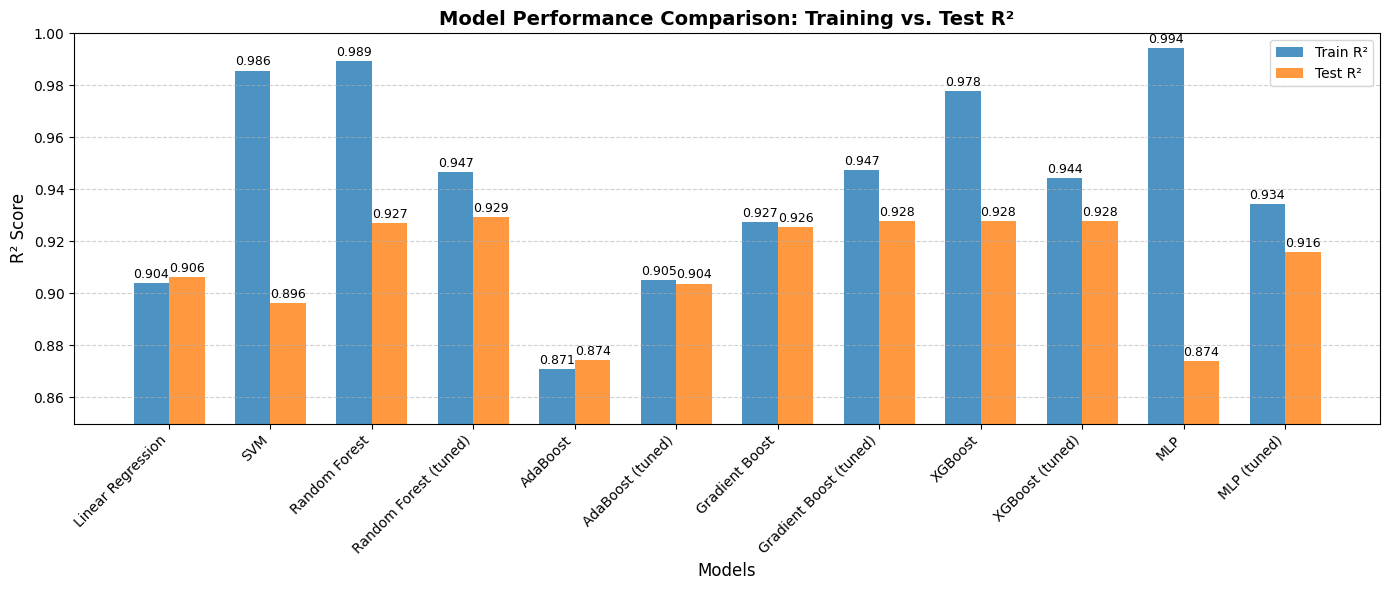

In [ ]:
models = [
    "Linear Regression", "SVM", "Random Forest", "Random Forest (tuned)",
    "AdaBoost", "AdaBoost (tuned)", "Gradient Boost", "Gradient Boost (tuned)",
    "XGBoost", "XGBoost (tuned)", "MLP", "MLP (tuned)"
]

r2_train = [
    0.9041, 0.9857, 0.9894, 0.9468,
    0.8709, 0.9051, 0.9274, 0.9473,
    0.9779, 0.9444, 0.9942, 0.9344
]

r2_test = [
    0.9064, 0.8963, 0.9270, 0.9294,
    0.8744, 0.9038, 0.9256, 0.9278,
    0.9278, 0.9278, 0.8741, 0.9160
]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, r2_train, width, label = 'Train R²', alpha = 0.8)
plt.bar(x + width/2, r2_test, width, label = 'Test R²', alpha = 0.8)

plt.title("Model Performance Comparison: Training vs. Test R²", fontsize = 14, fontweight = 'bold')
plt.xlabel("Models", fontsize = 12)
plt.ylabel("R² Score", fontsize = 12)
plt.xticks(x, models, rotation = 45, ha = "right")
plt.ylim(0.85, 1.00)
plt.legend()
plt.grid(axis = "y", linestyle="--", alpha = 0.6)

for i in range(len(models)):
    plt.text(x[i] - width/2, r2_train[i] + 0.002, f"{r2_train[i]:.3f}", ha = 'center', fontsize = 9)
    plt.text(x[i] + width/2, r2_test[i] + 0.002, f"{r2_test[i]:.3f}", ha = 'center', fontsize = 9)

plt.tight_layout()
plt.show()


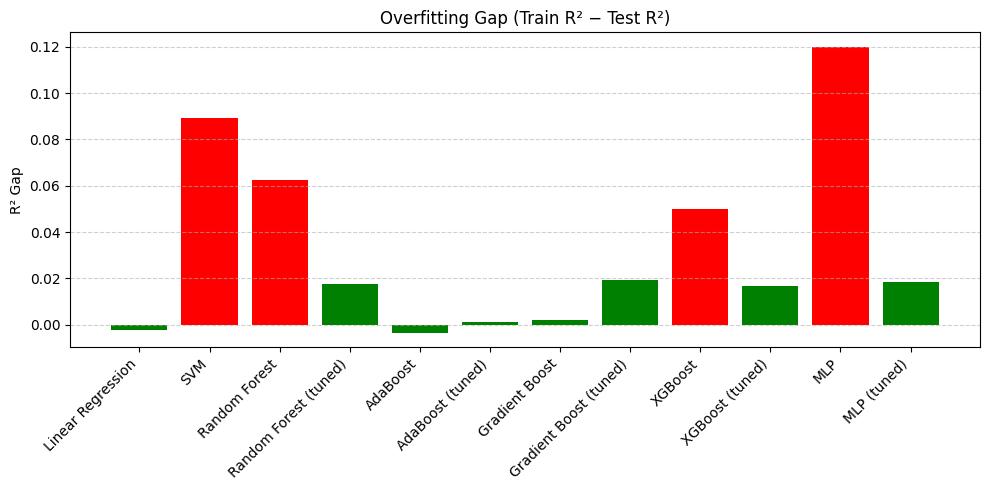

In [ ]:
gaps = np.array(r2_train) - np.array(r2_test)

plt.figure(figsize=(10,5))
plt.bar(models, gaps, color=['green' if g<0.02 else 'orange' if g<0.05 else 'red' for g in gaps])
plt.title("Overfitting Gap (Train R² − Test R²)")
plt.ylabel("R² Gap")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

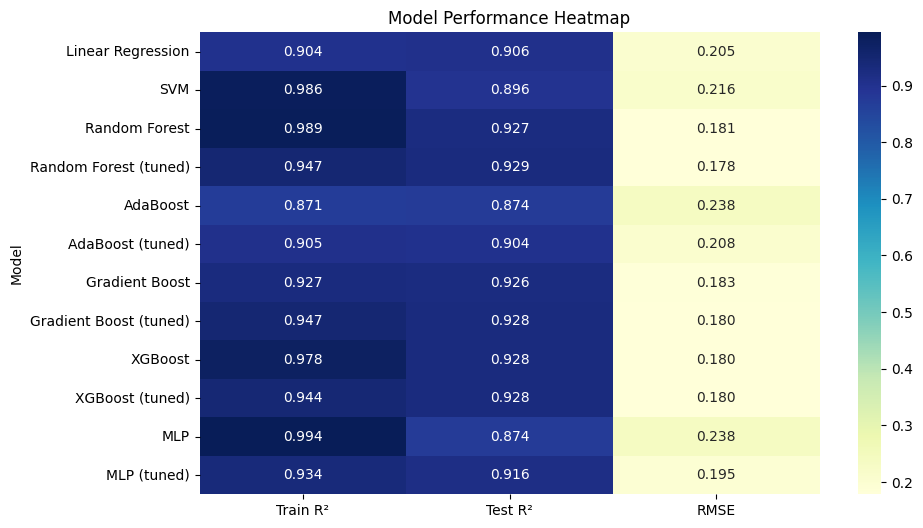

In [ ]:
data = {
    'Model': models,
    'Train R²': r2_train,
    'Test R²': r2_test,
    'RMSE': [0.2053, 0.2160, 0.1812, 0.1783, 0.2378, 0.2081,
             0.1830, 0.1802, 0.1803, 0.1803, 0.2381, 0.1945]
}

df = pd.DataFrame(data).set_index('Model')
plt.figure(figsize = (10,6))
sns.heatmap(df, annot = True, cmap = 'YlGnBu', fmt = ".3f")
plt.title("Model Performance Heatmap")
plt.show()

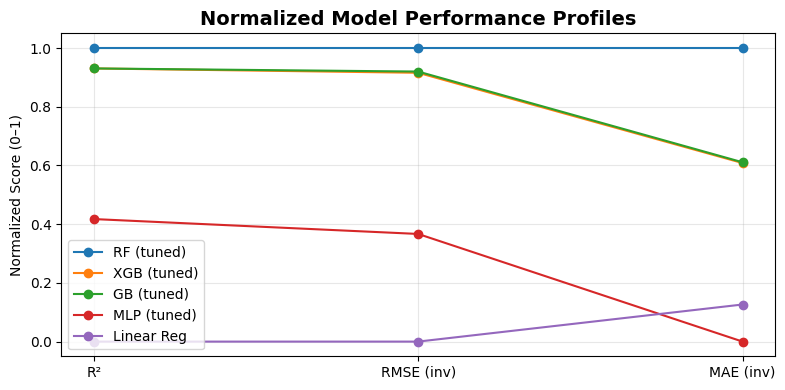

In [ ]:
df = pd.DataFrame({
    "Model": ["RF (tuned)", "XGB (tuned)", "GB (tuned)", "MLP (tuned)", "Linear Reg"],
    "R²": [0.9294, 0.9278, 0.9278, 0.9160, 0.9064],
    "RMSE": [0.1783, 0.1803, 0.1802, 0.1945, 0.2053],
    "MAE": [0.0608, 0.0732, 0.0731, 0.1071, 0.0977]
})

# Normalize so higher = better (invert errors)
df["1/RMSE"] = 1/df["RMSE"]
df["1/MAE"] = 1/df["MAE"]
norm = MinMaxScaler().fit_transform(df[["R²", "1/RMSE", "1/MAE"]])
norm_df = pd.DataFrame(norm, columns=["R²", "RMSE (inv)", "MAE (inv)"], index=df["Model"])

plt.figure(figsize=(8,4))
for i, (model, row) in enumerate(norm_df.iterrows()):
    plt.plot(row.index, row.values, marker='o', label=model)

plt.title("Normalized Model Performance Profiles", fontsize=14, fontweight='bold')
plt.ylabel("Normalized Score (0–1)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

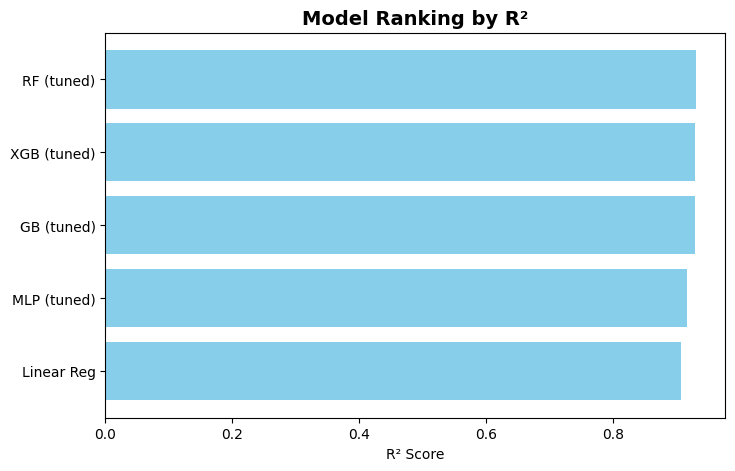

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(df["Model"], df["R²"], color='skyblue')
plt.title("Model Ranking by R²", fontsize=14, fontweight='bold')
plt.xlabel("R² Score")
plt.gca().invert_yaxis()
plt.show()
